# 👀 Multilayer perceptron (MLP)

In this notebook, we'll walk through the steps required to train your own multilayer perceptron on the CIFAR dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

2023-12-30 16:25:43.609892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 16:25:43.990654: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 0. Parameters <a name="parameters"></a>

In [2]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

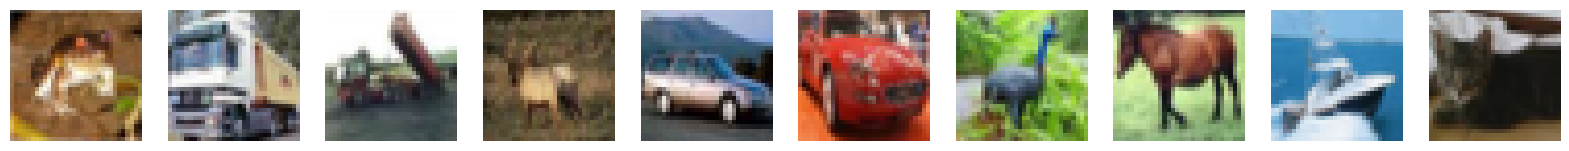

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [5]:
display(x_train[:10])
print(y_train[:10])

In [18]:
x_train.shape

(50000, 32, 32, 3)

This means that this is a tensor of shape (N, C, H, W), where:

N - number of samples in the dataset
C, H - size of image
W - channels (RGB)

In [17]:
x_train[54, 1, 12, 1]

0.33333334

## 2. Build the model <a name="build"></a>

In [35]:
input_layer = layers.Input((32, 32, 3))

# Sequential model instead of functional API
x = layers.Flatten()(input_layer)
x = layers.Dense(800, activation="relu")(x)
x = layers.Dense(400, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 3072)              0         
                                                                 
 dense_17 (Dense)            (None, 800)               2458400   
                                                                 
 dense_18 (Dense)            (None, 400)               320400    
                                                                 
 dense_19 (Dense)            (None, 10)                4010      


                                                                 
Total params: 2,782,810
Trainable params: 2,782,810
Non-trainable params: 0
_________________________________________________________________


## 3. Train the model <a name="train"></a>

In [36]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [37]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8339 - accuracy: 0.3376
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6357 - accuracy: 0.4151
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5505 - accuracy: 0.4452
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4931 - accuracy: 0.4666
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4469 - accuracy: 0.4837
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4045 - accuracy: 0.5010
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3712 - accuracy: 0.5117
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3396 - accuracy: 0.5216
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3088 - accuracy: 0.5347
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

## 4. Evaluation <a name="evaluate"></a>

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4327 - accuracy: 0.4938


[1.4327391386032104, 0.49380001425743103]

In [33]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 0s 1ms/step


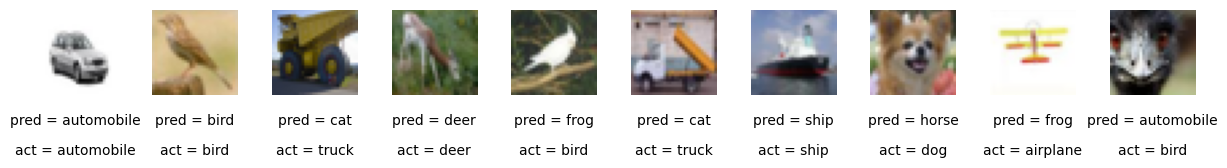

In [34]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)